In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## 1. Exploratory Data Analysis:

In [2]:
df = pd.read_csv("housing.csv")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
# we have only one non-numerical variable, lets take a look at how many categories the column has:
df["ocean_proximity"].value_counts()
# we have 5 categories that can be easily transformed into numerical values before applying machine learning algorithm

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [5]:
df.describe(include="all")

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<1H OCEAN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9136
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909,NaN
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874,NaN
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,NaN
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000,NaN
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000,NaN
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000,NaN


In [6]:
df.corr()["median_house_value"].sort_values(ascending = False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

<ipython-input-7-b115f2fce5f1>:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(df.corr(), dtype=np.bool)


<AxesSubplot:>

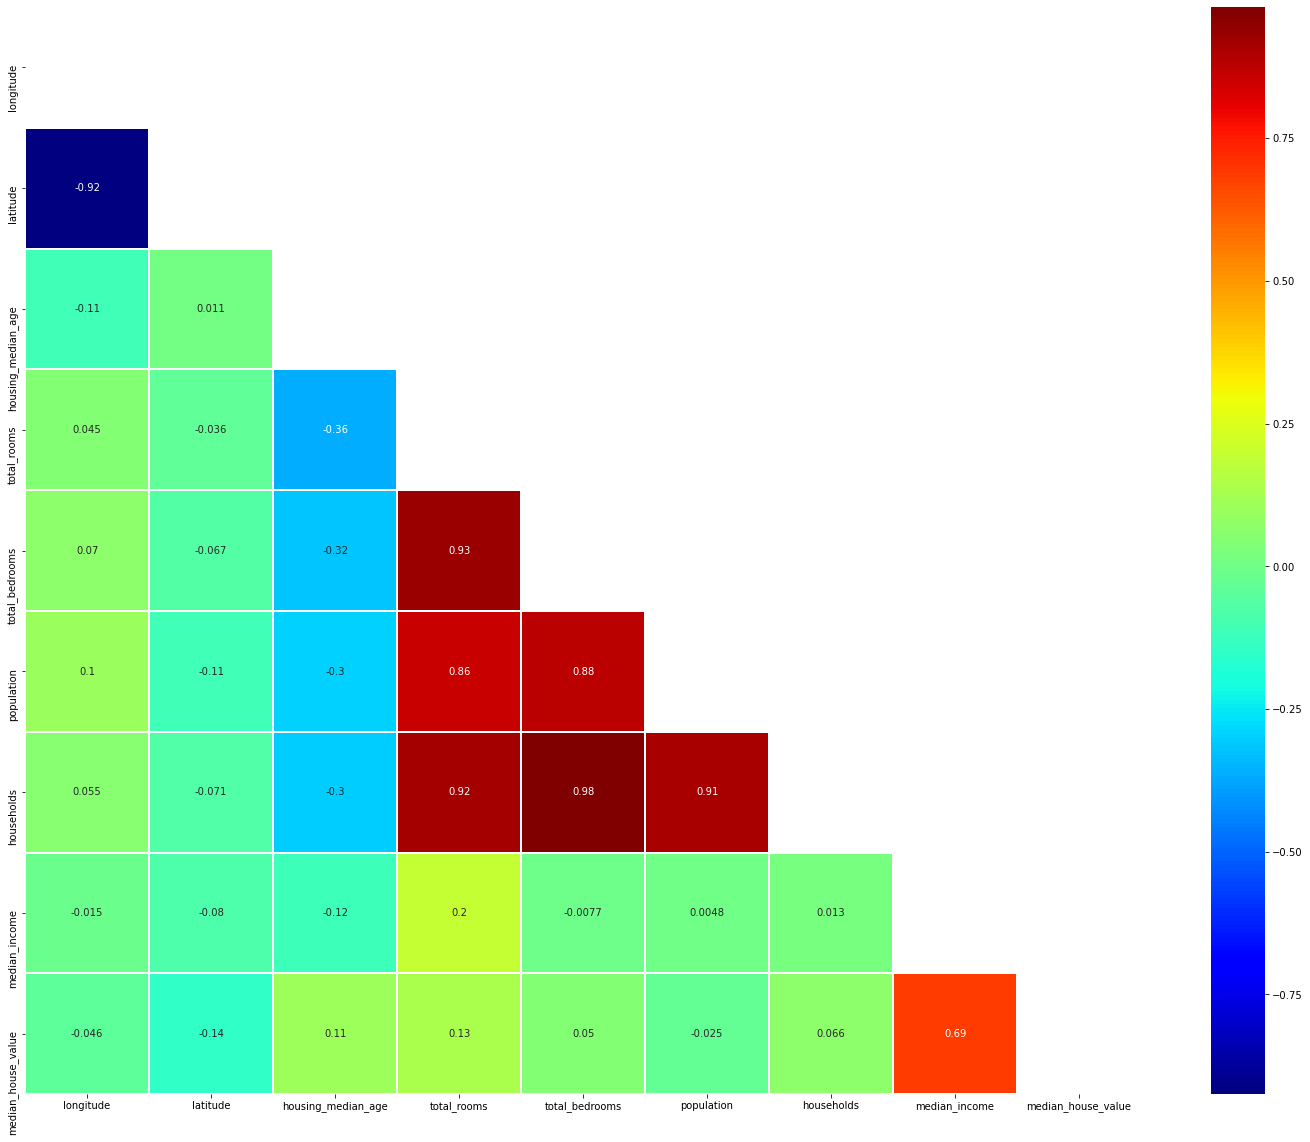

In [7]:
#Lets visualize overall correlations between all columns with each other
plt.figure(figsize=(25,20))
mask = np.zeros_like(df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(df.corr(),cmap="jet",annot=True,linewidths=1, linecolor='white',cbar=True,mask=mask)

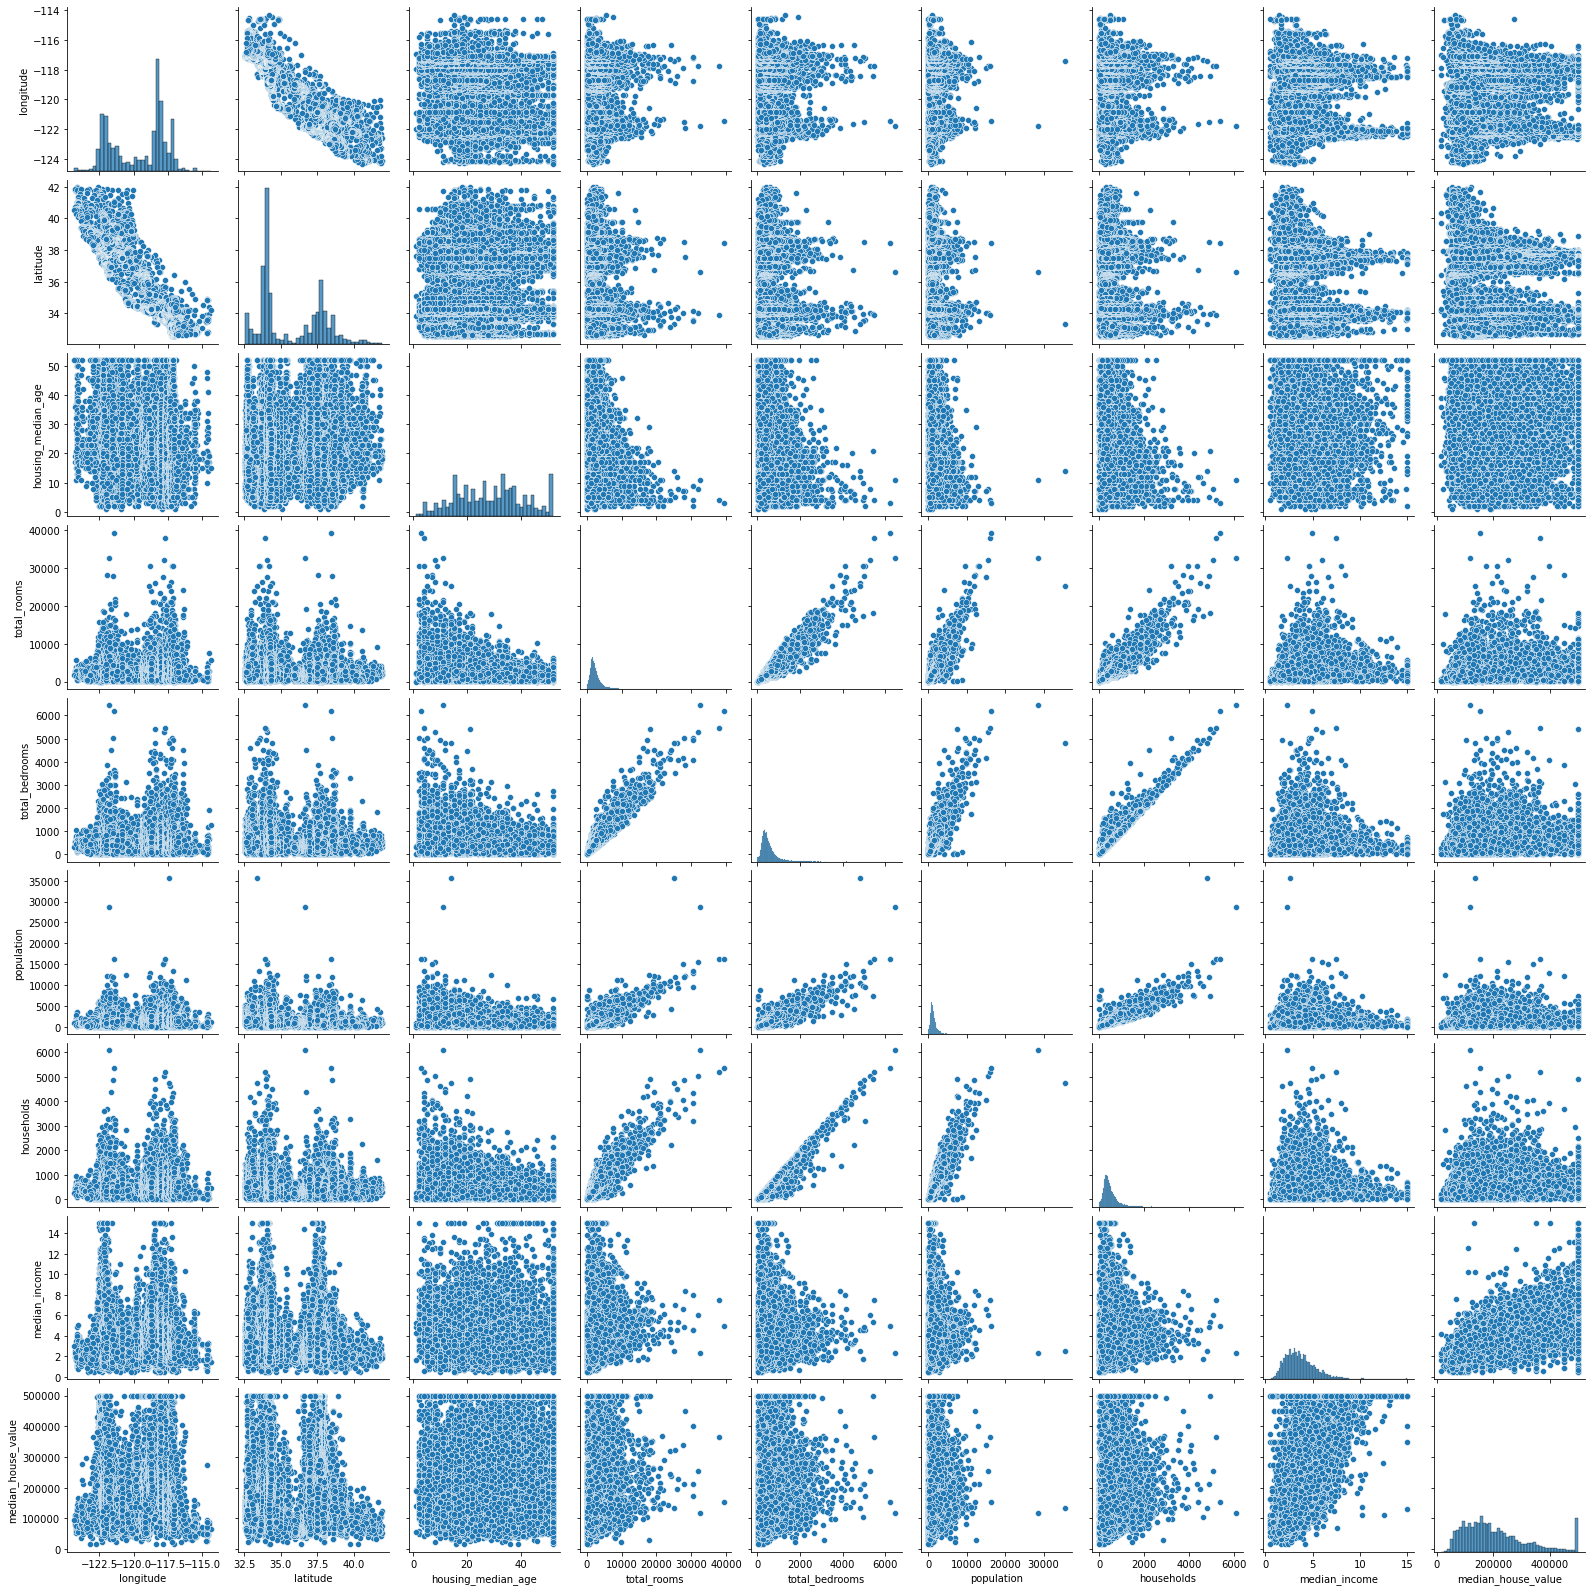

In [8]:
sns.pairplot(df)

array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

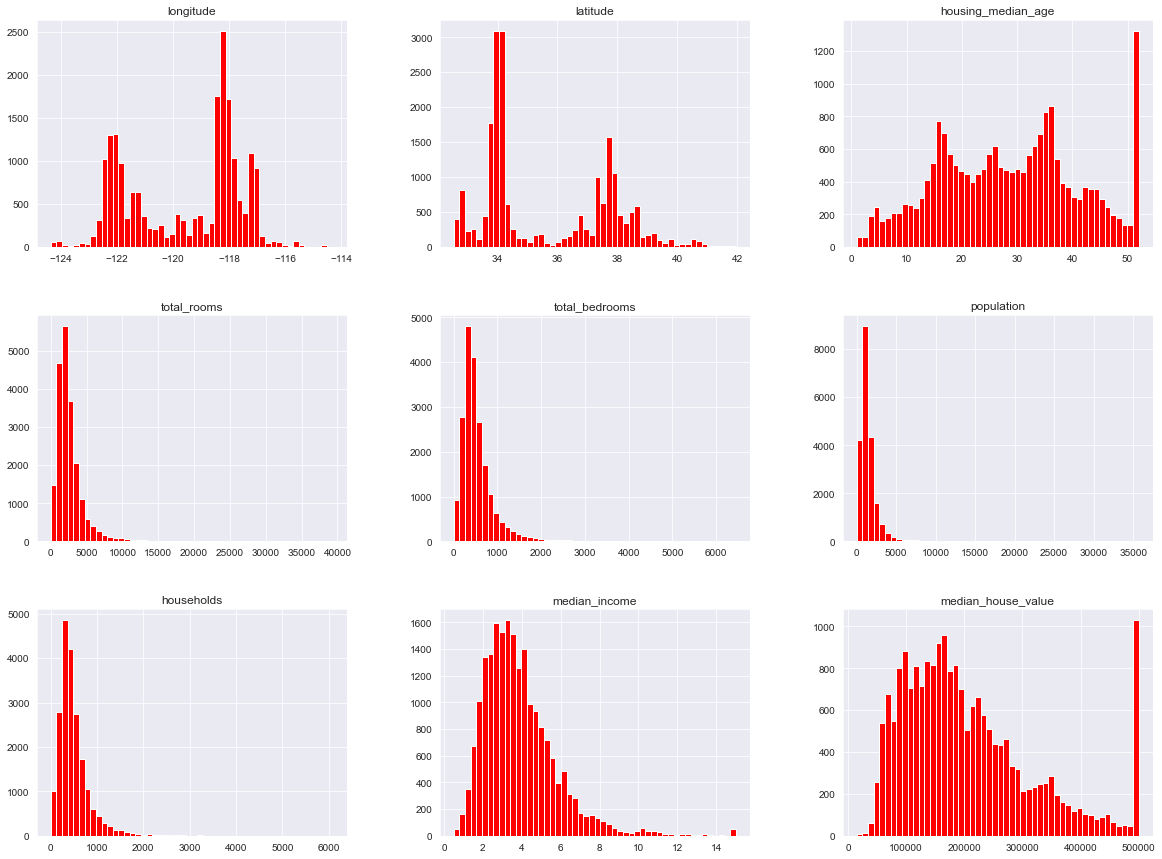

In [9]:
sns.set_style("darkgrid")
df.hist(bins=50,figsize=(20,15), color="red")

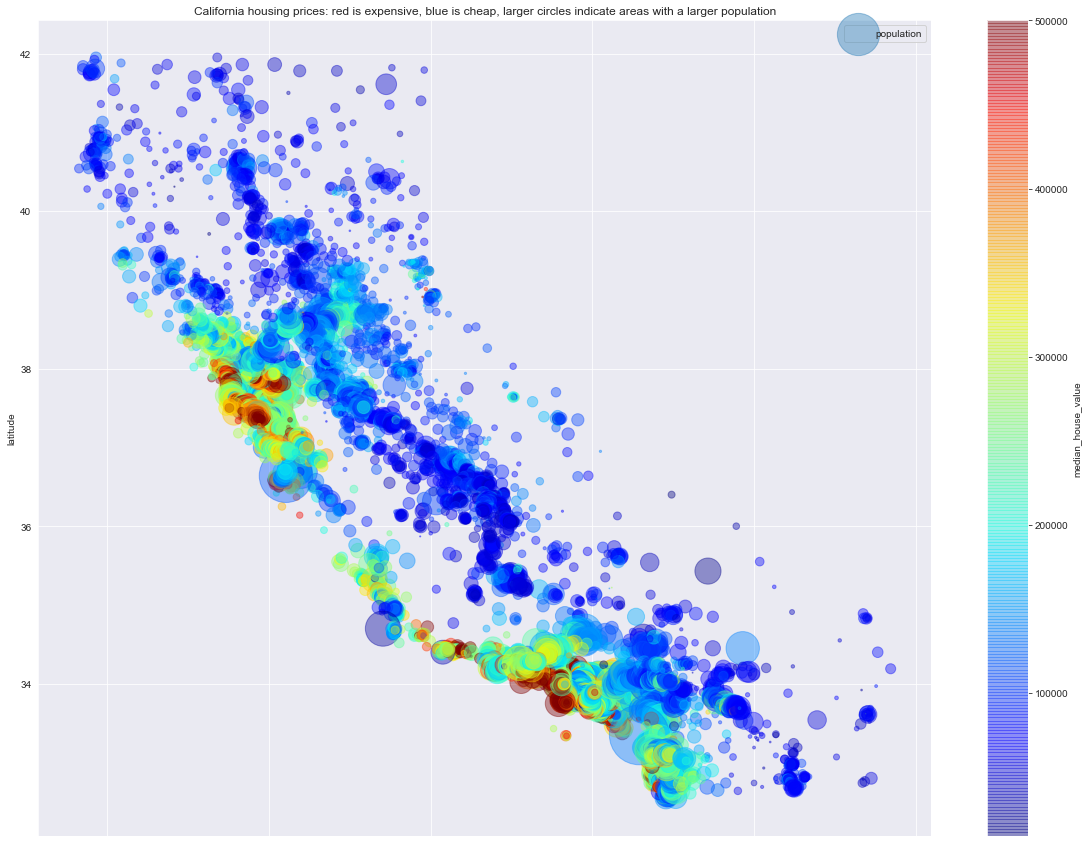

In [10]:
df.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
s=df["population"]/10, label="population", figsize=(20,15),
c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,title="California housing prices: red is expensive, blue is cheap, larger circles indicate areas with a larger population")
plt.legend()

#The radius of each circle represents the district’s population (option s), and the color represents the price (option c). 
#We will use a predefined color map (option cmap) called jet, which ranges from blue (low values) to red (high prices):
#c value are represented in the colorbar 
#The size of the circle represent the amounth of the population and the color inside it is the median house value

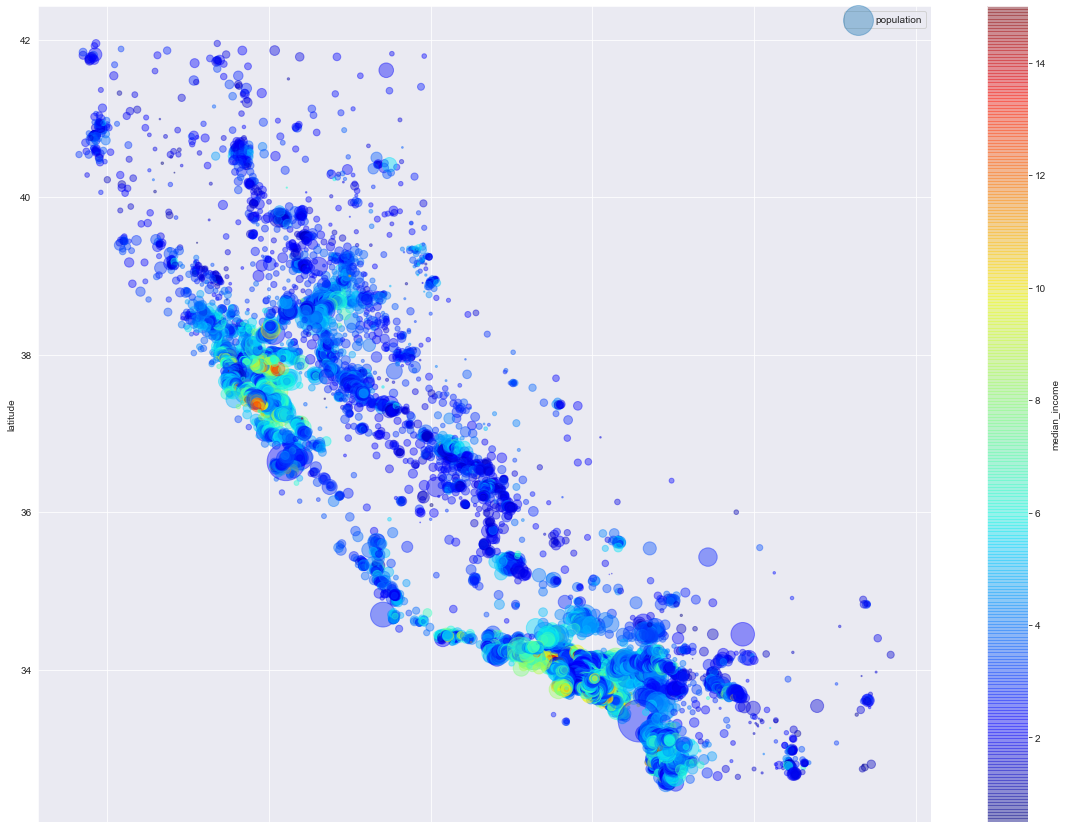

In [11]:
df.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
s=df["population"]/20, label="population", figsize=(20,15),
c="median_income", cmap=plt.get_cmap("jet"), colorbar=True,)
plt.legend()

## 2. Cleaning the Data and Adding New Features:

In [12]:
df["total_bedrooms"].fillna(df["total_bedrooms"].median,inplace=True)

In [13]:
# we will make some feature engineering in order to regularize the total bedrooms and total rooms
df["total_bedrooms"]= pd.to_numeric(df["total_bedrooms"],errors = 'coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [14]:
df["total_bedrooms"]

0         129.0
1        1106.0
2         190.0
3         235.0
4         280.0
          ...  
20635     374.0
20636     150.0
20637     485.0
20638     409.0
20639     616.0
Name: total_bedrooms, Length: 20640, dtype: float64

In [15]:
df["rooms_per_household"]=df["total_rooms"]/df["households"]
df["bedrooms_per_room"]=df["total_bedrooms"]/df["total_rooms"]
df["population_per_household"]=df["population"]/df["households"]
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,0.146591,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,0.155797,2.109842
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136,0.129516,2.802260
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352,0.184458,2.547945
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853,0.172096,2.181467


In [16]:
df.drop(["total_rooms","total_bedrooms","population","households"],axis=1,inplace= True)
df.head()

,longitude,latitude,housing_median_age,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
0,-122.23,37.88,41.0,8.3252,452600.0,NEAR BAY,6.984127,0.146591,2.555556
1,-122.22,37.86,21.0,8.3014,358500.0,NEAR BAY,6.238137,0.155797,2.109842
2,-122.24,37.85,52.0,7.2574,352100.0,NEAR BAY,8.288136,0.129516,2.802260
3,-122.25,37.85,52.0,5.6431,341300.0,NEAR BAY,5.817352,0.184458,2.547945
4,-122.25,37.85,52.0,3.8462,342200.0,NEAR BAY,6.281853,0.172096,2.181467


In [17]:
df.isnull().sum() #There is no any missing value

longitude                     0
latitude                      0
housing_median_age            0
median_income                 0
median_house_value            0
ocean_proximity               0
rooms_per_household           0
bedrooms_per_room           207
population_per_household      0
dtype: int64

In [18]:
df["bedrooms_per_room"].fillna(df["bedrooms_per_room"].mean(),inplace=True)

In [19]:
df.isnull().sum() 

longitude                   0
latitude                    0
housing_median_age          0
median_income               0
median_house_value          0
ocean_proximity             0
rooms_per_household         0
bedrooms_per_room           0
population_per_household    0
dtype: int64

<AxesSubplot:>

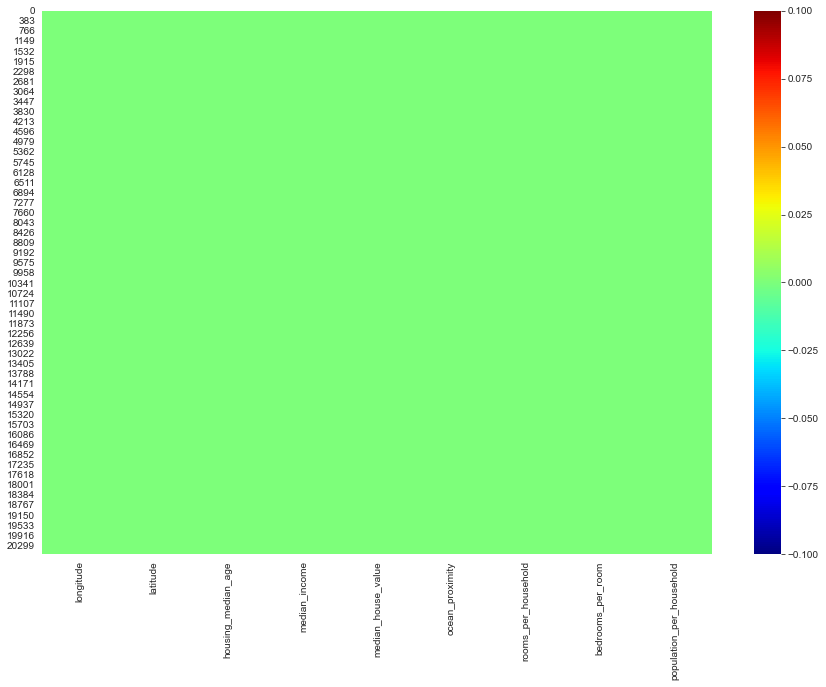

In [20]:
plt.figure(figsize=(15,10))
sns.heatmap(df.isnull(),cmap="jet")

In [21]:
df["ocean_proximity"].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [22]:
df["ocean_proximity"] = df["ocean_proximity"].map({'INLAND':1,'<1H OCEAN':2, 'NEAR BAY':3, 'NEAR OCEAN':4,'ISLAND':5})

In [23]:
df["ocean_proximity"].unique()

array([3, 2, 1, 4, 5], dtype=int64)

In [24]:
X = df.drop("median_house_value",axis=1)
y = df["median_house_value"]

In [25]:
X.isnull().sum()

longitude                   0
latitude                    0
housing_median_age          0
median_income               0
ocean_proximity             0
rooms_per_household         0
bedrooms_per_room           0
population_per_household    0
dtype: int64

In [26]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   longitude                 20640 non-null  float64
 1   latitude                  20640 non-null  float64
 2   housing_median_age        20640 non-null  float64
 3   median_income             20640 non-null  float64
 4   ocean_proximity           20640 non-null  int64  
 5   rooms_per_household       20640 non-null  float64
 6   bedrooms_per_room         20640 non-null  float64
 7   population_per_household  20640 non-null  float64
dtypes: float64(7), int64(1)
memory usage: 1.3 MB


In [27]:
X

,longitude,latitude,housing_median_age,median_income,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
0,-122.23,37.88,41.0,8.3252,3,6.984127,0.146591,2.555556
1,-122.22,37.86,21.0,8.3014,3,6.238137,0.155797,2.109842
2,-122.24,37.85,52.0,7.2574,3,8.288136,0.129516,2.802260
3,-122.25,37.85,52.0,5.6431,3,5.817352,0.184458,2.547945
4,-122.25,37.85,52.0,3.8462,3,6.281853,0.172096,2.181467
...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1.5603,1,5.045455,0.224625,2.560606
20636,-121.21,39.49,18.0,2.5568,1,6.114035,0.215208,3.122807
20637,-121.22,39.43,17.0,1.7000,1,5.205543,0.215173,2.325635
20638,-121.32,39.43,18.0,1.8672,1,5.329513,0.219892,2.123209


In [28]:
y

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20640, dtype: float64

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.04, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(19814, 8)
(19814,)
(826, 8)
(826,)


## 3. Model Training and Evaluation

3.1.Linear Regression:

In [31]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [32]:
predictions=lm.predict(X_test)
predictions

array([ 59541.52536673, 149961.85553215, 244271.31171422, 294721.1664925 ,
       273850.52813878, 201202.18355182, 273182.57881719, 211036.18920962,
       258165.88019117, 414111.10390347,  87381.97075848, 170404.70402248,
       154474.83741426, 225066.76359407, 276142.46689997, 192509.99612687,
       246229.65171671, 194451.51801398, 239998.76587039, 108838.34600321,
       273986.98047365, 257233.01278231, 209755.36046608, 363667.56208985,
       214697.52706563,  81297.36596254, 154666.89695973, 183471.22112425,
       186207.42775551, 357459.74122013, 141033.45302877, 117208.01155294,
       197265.6853387 , 389861.17738863, 254003.65997937, 273464.9439201 ,
       283019.21224241, 188741.76567204, 128807.44956751, 168640.7067706 ,
       335376.58782276, 151900.88224697,  91174.57503276, 182628.45695357,
       173150.15632641, 174243.08258573, 224128.30053691, 205319.76820896,
       206272.37788184, 187257.89169036, 247018.34805803, 146560.43682583,
       192206.40966722,  

C:\Users\Bruker\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='median_house_value', ylabel='Density'>

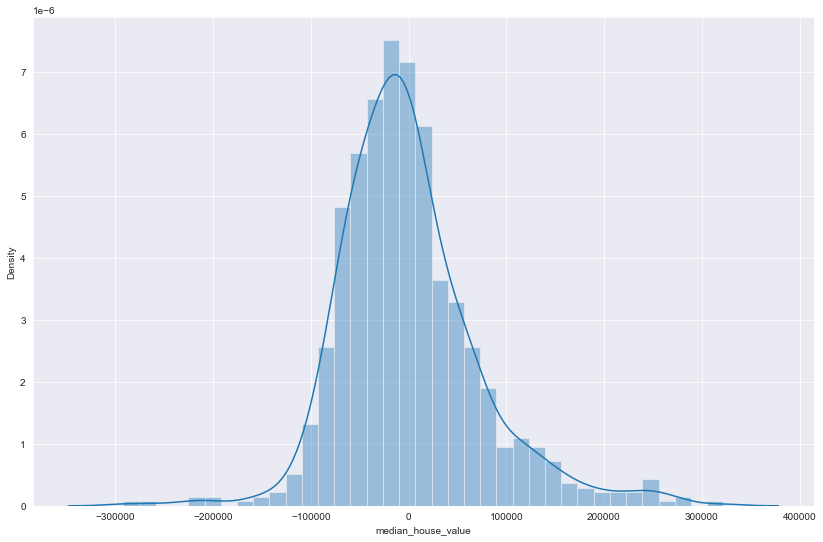

In [33]:
plt.figure(figsize=(14,9))
sns.distplot(y_test-predictions)

<AxesSubplot:ylabel='median_house_value'>

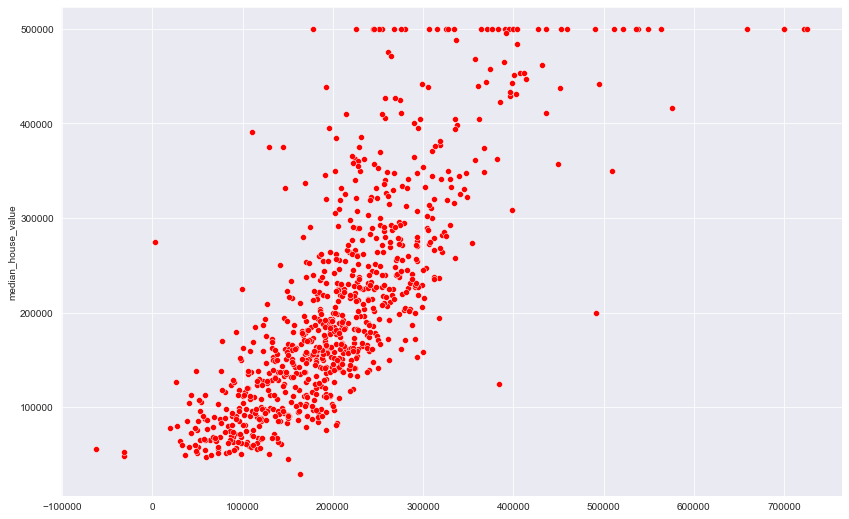

In [34]:
plt.figure(figsize=(14,9))
sns.scatterplot(x=predictions,y=y_test,color="red")

In [35]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [36]:
print("MAE:",mean_absolute_error(y_test,predictions))
print ("MSE:",mean_squared_error(y_test,predictions))
print("RMSE:",np.sqrt(mean_squared_error(y_test,predictions)))

MAE: 52239.5405170431
MSE: 5178945167.966103
RMSE: 71964.88843850244


In [37]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = lm, X = X_train, y = y_train, cv = 5)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 61.59 %
Standard Deviation: 0.90 %


3.2.RandomForestRegressor:

In [38]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor()
forest.fit(X_train,y_train)


RandomForestRegressor()

In [39]:
predictions = forest.predict(X_test)
print("MAE:",mean_absolute_error(y_test,predictions))
print ("MSE:",mean_squared_error(y_test,predictions))
print("RMSE:",np.sqrt(mean_squared_error(y_test,predictions)))

MAE: 29541.738644067795
MSE: 2049152585.146923
RMSE: 45267.566591842806


In [40]:

accuracies = cross_val_score(estimator = forest, X = X_train, y = y_train, cv = 5)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))
#It seems random fores has very good accuracy in test data, is the best to this point

Accuracy: 81.87 %
Standard Deviation: 0.80 %


3.3.Linear Regression:

In [41]:
from sklearn.tree import DecisionTreeRegressor
dtree = DecisionTreeRegressor()
dtree.fit(X_train,y_train)
predictions2 = dtree.predict(X_test)
print(mean_absolute_error(y_test,predictions2))
print(mean_squared_error(y_test,predictions2))
print(np.sqrt(mean_squared_error(y_test,predictions2))) 

41123.053268765136
4167619490.1234865
64557.10255365777


In [42]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = dtree, X = X_train, y = y_train, cv = 5)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 64.69 %
Standard Deviation: 0.74 %


3.4.Light Gradient Boosting Regressor:

In [43]:
from xgboost import XGBRegressor
xgboost = XGBRegressor(learning_rate=0.01,
                       n_estimators=6000,
                       max_depth=4,
                       min_child_weight=0,
                       gamma=0.6,
                       subsample=0.7,
                       colsample_bytree=0.7,
                       objective='reg:squarederror',
                       nthread=-1,
                       scale_pos_weight=1,
                       seed=27,
                       reg_alpha=0.00006,
                       random_state=42)

In [44]:
xgboost.fit(X_train, y_train)
xgboost_predictions =xgboost.predict(X_test)
print(mean_absolute_error(y_test,xgboost_predictions))
print(mean_squared_error(y_test,xgboost_predictions))
print(np.sqrt(mean_squared_error(y_test,xgboost_predictions)))

28917.87204430236
1906698326.8274262
43665.756913483434


In [45]:
accuracies = cross_val_score(estimator = xgboost, X = X_train, y = y_train, cv = 3)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 84.29 %
Standard Deviation: 0.20 %


3.5. GradientBoostingRegressor:

In [46]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(n_estimators=6000,
                                learning_rate=0.01,
                                max_depth=4,
                                max_features='sqrt',
                                min_samples_leaf=15,
                                min_samples_split=10,
                                loss='huber',
                                random_state=42) 


In [47]:
gbr.fit(X_train,y_train)
gbr_predictions = gbr.predict(X_test)
print(mean_absolute_error(y_test,gbr_predictions))
print(mean_squared_error(y_test,gbr_predictions))
print(np.sqrt(mean_squared_error(y_test,gbr_predictions))) 

28771.2104285686
1933567225.972661
43972.34615042346


In [48]:
accuracies = cross_val_score(estimator = gbr, X = X_train, y = y_train, cv = 3)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 83.79 %
Standard Deviation: 0.03 %


3.6. LGBMRegressor:

In [49]:
from lightgbm import LGBMRegressor
lightgbm = LGBMRegressor(objective='regression', 
                       num_leaves=6,
                       learning_rate=0.01, 
                       n_estimators=7000,
                       max_bin=200, 
                       bagging_fraction=0.8,
                       bagging_freq=4, 
                       bagging_seed=8,
                       feature_fraction=0.2,
                       feature_fraction_seed=8,
                       min_sum_hessian_in_leaf = 11,
                       verbose=-1,
                       random_state=42)

In [50]:
lightgbm.fit(X_train,y_train)
lightgbm_predictions = lightgbm.predict(X_test)
print(mean_absolute_error(y_test,lightgbm_predictions))
print(mean_squared_error(y_test,lightgbm_predictions))
print(np.sqrt(mean_squared_error(y_test,lightgbm_predictions))) 

[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
33154.11186108814
2315563626.4068017
48120.303681572936


In [51]:
accuracies = cross_val_score(estimator = lightgbm, X = X_train, y = y_train, cv = 5)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] featu

3.9. Blend Prediction:

In [54]:
# Blend models in order to make the final predictions more robust to overfitting
blend_predictions=( 
            (0.025 * forest.predict(X_test)) + \
            (0.142 * gbr.predict(X_test)) + \
            (0.8 * xgboost.predict(X_test)) + \
            (0.03 * lightgbm.predict(X_test))) 

In [55]:
print(mean_absolute_error(y_test,blend_predictions))
print(mean_squared_error(y_test,blend_predictions))
print(np.sqrt(mean_squared_error(y_test,blend_predictions))) 

28736.041795370435
1893317371.539886
43512.26690876822


In [92]:
X_train

,longitude,latitude,housing_median_age,median_income,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
133,-122.21,37.83,34.0,6.8976,3,6.612272,0.155577,2.124021
1006,-121.75,37.69,26.0,3.7212,1,5.070881,0.202493,2.724138
6164,-117.95,34.08,37.0,3.2969,2,5.030973,0.178540,2.973451
12495,-121.48,38.58,52.0,1.5872,1,3.532486,0.302679,1.526836
3184,-119.78,36.30,30.0,2.1681,1,5.244318,0.211809,3.565341
...,...,...,...,...,...,...,...,...
11284,-117.96,33.78,35.0,6.3700,2,6.129032,0.151128,3.032258
11964,-117.43,34.02,33.0,3.0500,1,6.868597,0.184825,3.904232
5390,-118.38,34.03,36.0,2.9344,2,3.986717,0.270823,3.332068
860,-121.96,37.58,15.0,5.7192,2,6.395349,0.166993,3.178891


In [166]:
def predict_price(longitude,latitude,housing_median_age,median_income,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household):    
    lst = list()
    lst.append(longitude)
    lst.append(latitude)
    lst.append(housing_median_age)
    lst.append(median_income)
    lst.append(ocean_proximity)
    lst.append(rooms_per_household)
    lst.append(bedrooms_per_room)
    lst.append(population_per_household)
    single_house = pd.Series(lst).values.reshape(-1,8)
    return gbr.predict(single_house)
    

In [167]:
predict_price(-119.01,36.06,25.0,1.6812,1,4.192201,0.213039,3.877437)

array([54080.30099693])

## 4. Export the tested model to a pickle file

In [168]:
import pickle
with open('house_prices_model.pickle','wb') as f:
    pickle.dump(gbr,f)